# Demonstration of `Frequency_Spectrum` class objects

This notebook demonstrates how to initialize objects of the `Frequency_Spectrum` class, and the different functionalities of this class. The detailed documentation of this class is [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_frequency_spectrum.html).

_This notebook takes about 8 minutes to read through._

## 1. Import relevant libraries

In [1]:
import numpy as np

In [2]:
from PySeismoSoil.class_frequency_spectrum import Frequency_Spectrum

## 2. Initialize a `Frequency_Spectrum` object

You can initialize a `Frequency_Spectrum` object from a numpy array, or a text file containing two columns (frequency and spectrum).

### 2.1. Initialize with two columns of data (frequency and spectrum)

In [3]:
df = 0.01  # frequency resolution (unit: Hz)
n_pts = 5000
freq = np.linspace(df, n_pts * df, num=n_pts)
spect = freq**2.0

In [4]:
data = np.column_stack((freq, spect))
print(data)

[[1.0000000e-02 1.0000000e-04]
 [2.0000000e-02 4.0000000e-04]
 [3.0000000e-02 9.0000000e-04]
 ...
 [4.9980000e+01 2.4980004e+03]
 [4.9990000e+01 2.4990001e+03]
 [5.0000000e+01 2.5000000e+03]]


In [5]:
freq_spect = Frequency_Spectrum(data, interpolate=False)

In [6]:
freq_spect

df = 0.01 Hz, n_pts = 5000, f_min = 0.01 Hz, f_max = 50.00 Hz

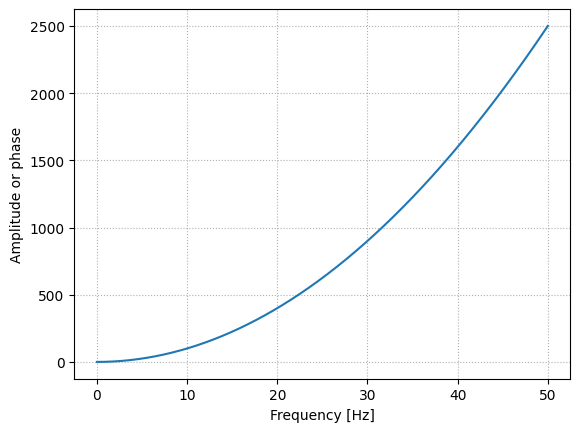

In [7]:
freq_spect.plot(logx=False);

### 2.2. Initialize with a single array of data (spectrum) and a $\Delta f$ (frequency resolution)

In [8]:
spect

array([1.0000000e-04, 4.0000000e-04, 9.0000000e-04, ..., 2.4980004e+03,
       2.4990001e+03, 2.5000000e+03], shape=(5000,))

In [9]:
freq_spect = Frequency_Spectrum(spect, df=df)

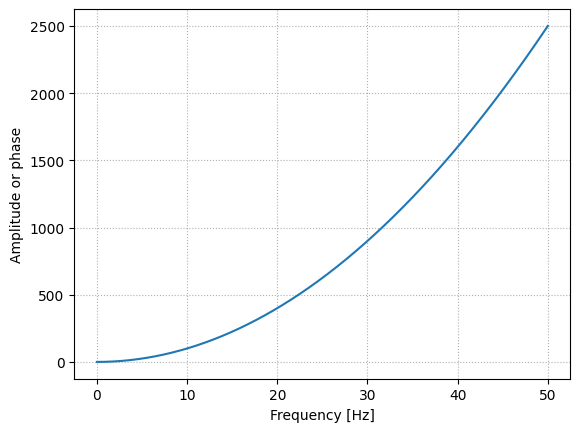

In [10]:
freq_spect.plot(logx=False);

### 2.3. Perform interpolation (w.r.t. frequency) during initialization

Same data source (`spect`), two different interpolation specifications:

In [11]:
fs_intp_1 = Frequency_Spectrum(
    spect, df=df, interpolate=True, fmin=0.1, fmax=30, n_pts=20, log_scale=True
)
fs_intp_2 = Frequency_Spectrum(
    spect,
    df=df,
    interpolate=True,
    fmin=5.0,
    fmax=25,
    n_pts=15,
    log_scale=False,
)

Results from two different interpolations:

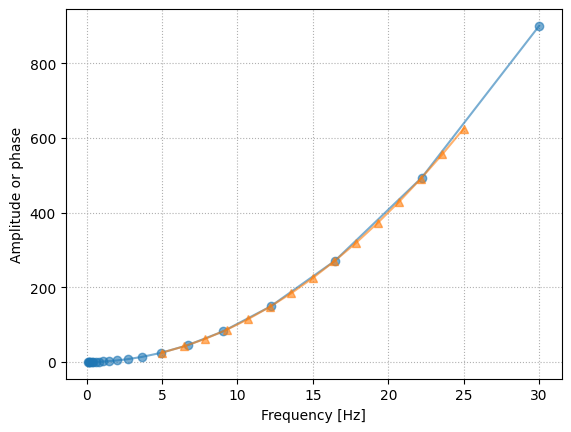

In [12]:
fig, ax = fs_intp_1.plot(logx=False, marker='o', alpha=0.6)
fs_intp_2.plot(fig=fig, ax=ax, logx=False, marker='^', alpha=0.6);

## 3. Attributes of a `Frequency_Spectrum` object

Manually create a complex-valued `Frequency_Spectrum` object:

In [13]:
df = 0.005
freq = np.arange(df, 50, step=df)
amplification = 2.76 * np.ones_like(freq)  # shaking is amplified by 2.76 times
phase_shift = -40.0 * freq  # also there is some delay
ampl_and_phase = amplification * np.exp(1j * phase_shift)

In [14]:
fs = Frequency_Spectrum(ampl_and_phase, df=df)

Query its values:

In [15]:
fs.spectrum

array([ 2.70498375-0.54832735j,  2.54212834-1.07479462j,
        2.2779263 -1.55841323j, ...,  0.61234009-2.69121527j,
        0.06547213-2.75922333j, -0.48400601-2.71722987j], shape=(9999,))

In [16]:
fs.spectrum_2col  # get frequency array as well, for convenience

array([[ 5.00000000e-03+0.j        ,  2.70498375e+00-0.54832735j],
       [ 1.00000000e-02+0.j        ,  2.54212834e+00-1.07479462j],
       [ 1.50000000e-02+0.j        ,  2.27792630e+00-1.55841323j],
       ...,
       [ 4.99850000e+01+0.j        ,  6.12340095e-01-2.69121527j],
       [ 4.99900000e+01+0.j        ,  6.54721253e-02-2.75922333j],
       [ 4.99950000e+01+0.j        , -4.84006011e-01-2.71722987j]],
      shape=(9999, 2))

Query its amplitude:

In [17]:
fs.amplitude

array([2.76, 2.76, 2.76, ..., 2.76, 2.76, 2.76], shape=(9999,))

In [18]:
fs.amplitude_2col  # get frequency array as well, for convenience

array([[5.0000e-03, 2.7600e+00],
       [1.0000e-02, 2.7600e+00],
       [1.5000e-02, 2.7600e+00],
       ...,
       [4.9985e+01, 2.7600e+00],
       [4.9990e+01, 2.7600e+00],
       [4.9995e+01, 2.7600e+00]], shape=(9999, 2))

Query its phase:

In [19]:
fs.phase

array([-0.2       , -0.4       , -0.6       , ..., -1.34707232,
       -1.54707232, -1.74707232], shape=(9999,))

In [20]:
fs.phase_2col  # get frequency array as well, for convenience

array([[ 5.00000000e-03, -2.00000000e-01],
       [ 1.00000000e-02, -4.00000000e-01],
       [ 1.50000000e-02, -6.00000000e-01],
       ...,
       [ 4.99850000e+01, -1.34707232e+00],
       [ 4.99900000e+01, -1.54707232e+00],
       [ 4.99950000e+01, -1.74707232e+00]], shape=(9999, 2))

Other attributes:

In [21]:
fs.freq  # frequency array

array([5.0000e-03, 1.0000e-02, 1.5000e-02, ..., 4.9985e+01, 4.9990e+01,
       4.9995e+01], shape=(9999,))

In [22]:
fs.iscomplex  # whether the spectrum is complex

np.True_

For a full list of attributes/methods, refer to the [documentation](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_frequency_spectrum.html).

## 3. Smooth a frequency spectrum

This example shows a Fourier spectrum of a earthquake ground motion, and how it is smoothed. For information about the `Ground_Motion` class, see its [documentations](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_ground_motion.html) and [examples](./Demo_01_Ground_Motion.ipynb).

In [23]:
from PySeismoSoil.class_ground_motion import Ground_Motion

In [24]:
gm = Ground_Motion('../tests/files/sample_accel.txt', unit='gal')

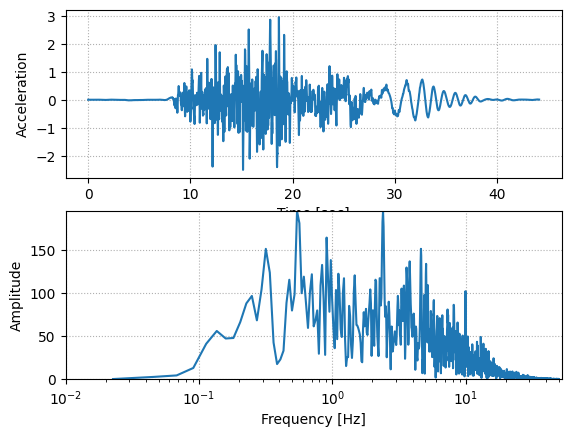

In [25]:
fs = gm.get_Fourier_spectrum(show_fig=True);

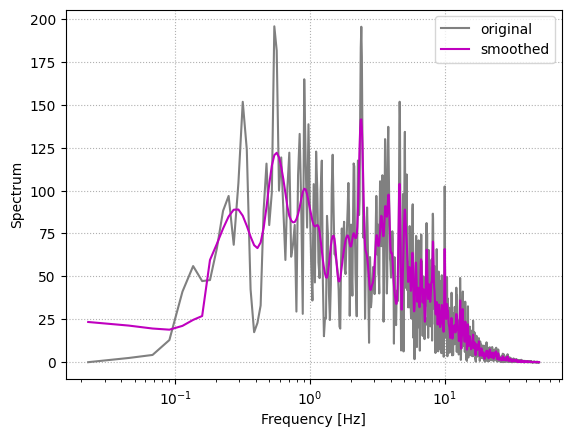

In [26]:
smoothed, fig, ax = fs.get_smoothed(show_fig=True, log_scale=True)

In [27]:
smoothed

array([23.4873501 , 21.39328628, 19.68461396, ...,  0.11550395,
        0.1151169 ,  0.10514472], shape=(2207,))